<a href="https://colab.research.google.com/github/Swayamprakashpatel/Sol_ME/blob/main/Sol_ME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
#import tensorflowjs as tfjs
import pandas as pd 
import numpy as np 
import io
#df = pd.read_csv('/content/drive/My Drive/DE.csv', low_memory=False,)
url = '/content/Data_FP.csv'
df = pd.read_csv(url, low_memory=False,) # Run for labeled data
 
#df.fillna('&',inplace=True)
df.drop('DRUG', axis = 1, inplace = True)
df.drop('CARRIER', axis = 1, inplace = True)
print(df.shape)
df.head()
df.dtypes
df.columns[df.isna().any()].tolist()
dataset = df.values


(408, 1763)


In [2]:
X = dataset[:,0:1762]
#Y = dataset[:,1762:1763]
# Run this for labeled data
Y = dataset[:,1762:1763] 
#print(X, X.shape,X.dtype)
#print(Y, Y.shape, Y.dtype)
 

In [55]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.1,random_state = 10 )
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state= 10)
import numpy as np
 
X_train = np.asarray(X_train).astype(np.int64)
X_val = np.asarray(X_val).astype(np.int64)
X_test = np.asarray(X_test).astype(np.int64)
Y_train = np.asarray(Y_train).astype(np.int64)
Y_val = np.asarray(Y_val).astype(np.int64)
Y_test = np.asarray(Y_test).astype(np.int64)
 
filepath = '/content/drive/My Drive/SOLModel.hdf5'
 
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1), 
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=75, verbose =1)]
output_nodes = Y.shape[1]
print(output_nodes)


1


Epoch 1/2000
12/12 [==============================] - ETA: 0s - loss: 7598.2056 - root_mean_squared_error: 87.1677
Epoch 1: val_root_mean_squared_error improved from inf to 36.82522, saving model to /content/drive/My Drive/SOLModel.hdf5
12/12 [==============================] - 1s 25ms/step - loss: 7598.2056 - root_mean_squared_error: 87.1677 - val_loss: 1356.0970 - val_root_mean_squared_error: 36.8252
Epoch 2/2000
12/12 [==============================] - ETA: 0s - loss: 6652.1479 - root_mean_squared_error: 81.5607
Epoch 2: val_root_mean_squared_error improved from 36.82522 to 35.84005, saving model to /content/drive/My Drive/SOLModel.hdf5
12/12 [==============================] - 0s 15ms/step - loss: 6652.1479 - root_mean_squared_error: 81.5607 - val_loss: 1284.5089 - val_root_mean_squared_error: 35.8400
Epoch 3/2000
 7/12 [================>.............] - ETA: 0s - loss: 5739.4492 - root_mean_squared_error: 75.7592
Epoch 3: val_root_mean_squared_error did not improve from 35.84005
12/

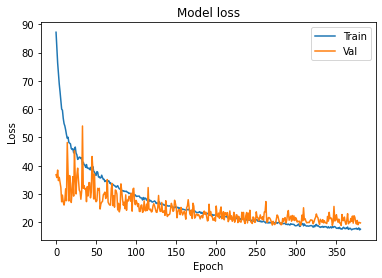

In [56]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512, activation='relu', input_shape=(1762,)),
                             tf.keras.layers.Dense(512, activation='relu'),
                             #tf.keras.layers.Dense(1762, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation ='linear')])

model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model.fit(X_train, Y_train, epochs= 2000, callbacks=[checkpoint],validation_data=(X_val, Y_val), batch_size= None)
model.evaluate(X_test, Y_test)
 
# Error Graph
import matplotlib.pyplot as plt
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
 

train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)

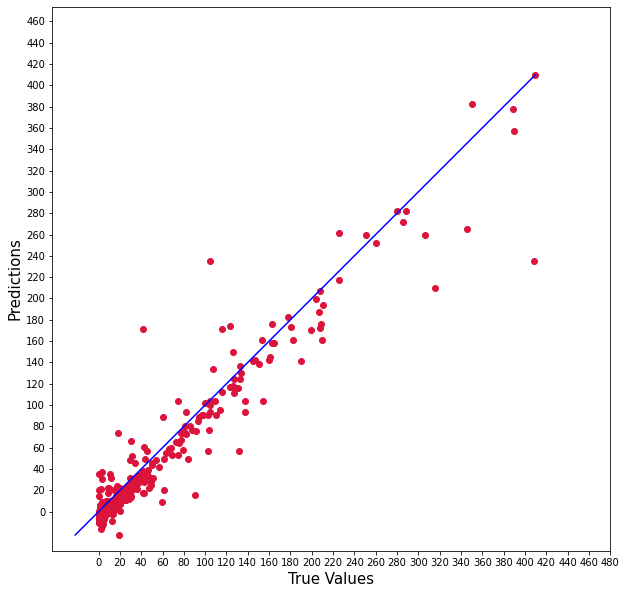

In [57]:
true_value = Y
predicted_value = model.predict(X)

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'blue')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.xticks( range(0,500,20) )
plt.yticks( range(0,500,20) )
plt.show()

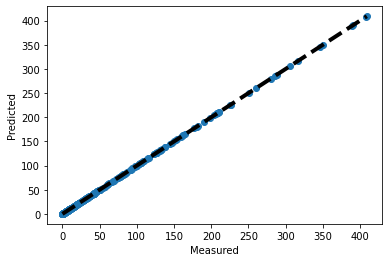

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets
y = Y

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, dataset, y, cv=50)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2 , shuffle=True)
for train, val in skf.split(X, Y, groups = None):

  filepath = '/content/drive/My Drive/SOLModel.hdf5'

  checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1), 
              tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=55, verbose =1)]
  output_nodes = Y.shape[1]
  print(output_nodes)

 
  model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1762, activation='relu', input_shape=(1762,)),
                             tf.keras.layers.Dense(1762, activation='relu'),
                             #tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation ='linear')])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.MeanSquaredError()])

  hist = model.fit(X[train].astype(np.int64), Y[train].astype(np.int64), epochs= 2000, callbacks=[checkpoint],validation_data=(X[val].astype(np.int64), Y[val].astype(np.int64)), batch_size= 100)


ValueError: ignored